# Twitter sentiment analysis

In [9]:
import pandas as pd

COLUMNS  = ['target', 'id', 'date', 'flag', 'user', 'text']

# Reading data with appropriate encoding
data = pd.read_csv('twitter_data.csv', encoding='iso8859_2', names=COLUMNS)

In [2]:
# What the data looks like
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Types and shape

In [3]:
data.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [4]:
data.shape

(1600000, 6)

### Target value

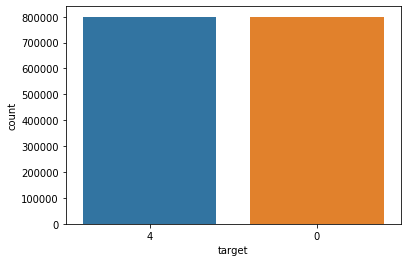

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data['target'], order=data['target'].value_counts().index)
plt.show()

The variable is balanced.

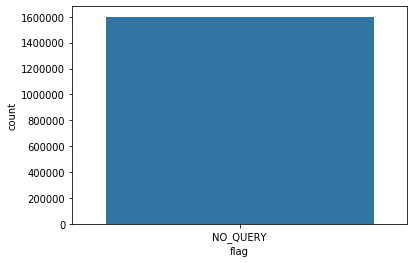

In [8]:
sns.countplot(data['flag'], order=data['flag'].value_counts().index)
plt.show()